# What are the most demanded skills for the top 3 most popular data roles?
### Methodology
1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

## import libraries and data


In [3]:
#importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#load data
df=pd.read_csv(r'C:\Users\mahak\Downloads\data_jobs.csv')
#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Filter Data for the India

In [4]:
df_Ind = df[df['job_country'] == 'India']

## Exploding Skills
Converts the job_skills column from string representations of lists into actual list objects and then expands these lists so each skill appears in its own row. It then displays the job_title and job_skills columns, allowing us to analyze the distribution of skills across different data job titles.

In [5]:
df_skills = df_Ind.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
16,Big Data Engineer,powershell
16,Big Data Engineer,python
16,Big Data Engineer,sql
16,Big Data Engineer,mysql
16,Big Data Engineer,sql server
...,...,...
785716,Application Support Analyst,c#
785716,Application Support Analyst,sql
785718,Senior Performance QA Analyst,NaN
785740,AWS System Analyst,aws


## Count skills per job title

In [6]:
# Group by job_skills and job_title_short and count the number of occurrences
df_skill_counts=df_skills.groupby(['job_skills', 'job_title_short']).size()
# Name the count column as count
df_skill_counts=df_skill_counts.reset_index(name='skill_count')
# Sort the values by skill_count in descending order
df_skill_counts.sort_values(by='skill_count', ascending=False, inplace=True)

df_skill_counts


,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
34,angular.js,Data Scientist,1
49,arch,Business Analyst,1
787,mlpack,Data Engineer,1
1679,yarn,Senior Data Scientist,1


## Creating list of top 3 roles

In [7]:
job_titles=df_skill_counts['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

## Plot Skill Counts
Creates a stacked horizontal bar chart for the top 5 skills for Top 3 roles, displaying the frequency of each skill.

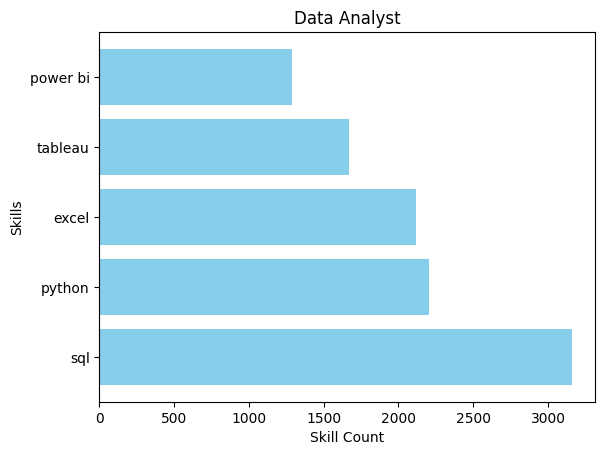

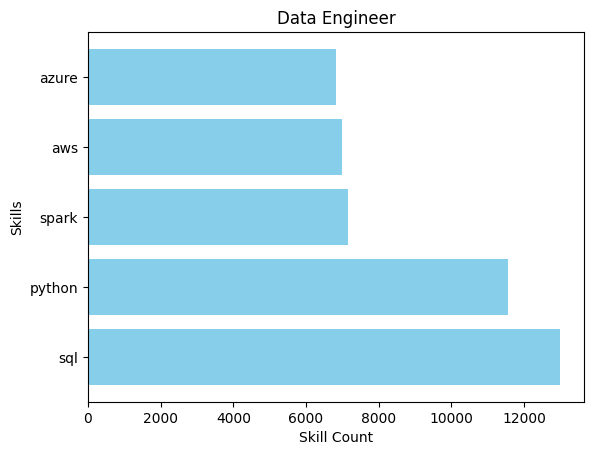

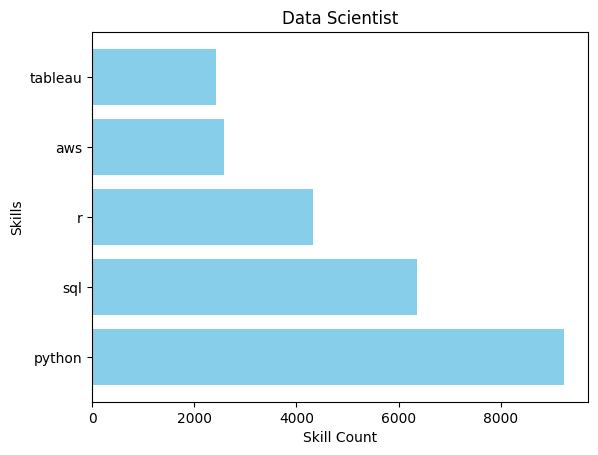

In [14]:
# Loop through job titles and plot top 5 skills using matplotlib
for job_title in job_titles:
    df_plot = df_skill_counts[df_skill_counts['job_title_short'] == job_title].head(5)
    
    plt.barh(df_plot['job_skills'], df_plot['skill_count'], color="skyblue")
    plt.title(job_title)
    plt.xlabel("Skill Count")
    plt.ylabel("Skills")
    plt.show()

## Convert Counts to Percentages
Focus: Counts don't show what portions of jobs are requesting these skills
So we'll convert the counts into percentages which helps us understand how each job title represents relative to the entire dataset.

Before we can calculate the percentages we need the total counts for the jobs posted by job title. Calculate the frequency of each job title using the value_counts() method on the job_title_short column. Then reset the index to transform the Series into a DataFrame and renames the columns to job_title_short and total. The DataFrame df_job_title_count now holds a list of job titles alongside their total occurrences.

In [10]:
# Use original df to get the count of job titles
df_job_title_count = df_Ind['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Engineer,19062
1,Data Scientist,13279
2,Data Analyst,6121
3,Senior Data Engineer,4353
4,Senior Data Scientist,2486
5,Business Analyst,1887
6,Software Engineer,1795
7,Senior Data Analyst,1083
8,Machine Learning Engineer,671
9,Cloud Engineer,351


Then we calculate the percentages. First merge df_skills_count and df_job_title_count, based on the 'job_title_short' column, ensuring each skill count is associated with the total number of job postings for that title. Then calculate the percentage of each skill within its job title by dividing the skill count by the total job postings and multiplying by 100, adding this new data as a 'percentage' column.

In [11]:
df_skills_perc = pd.merge(df_skill_counts, df_job_title_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,angular.js,Data Scientist,1,13279,0.007531
1685,arch,Business Analyst,1,1887,0.052994
1686,mlpack,Data Engineer,1,19062,0.005246
1687,yarn,Senior Data Scientist,1,2486,0.040225


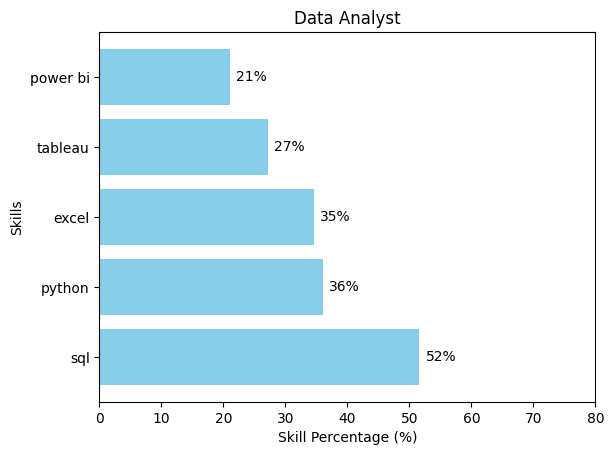

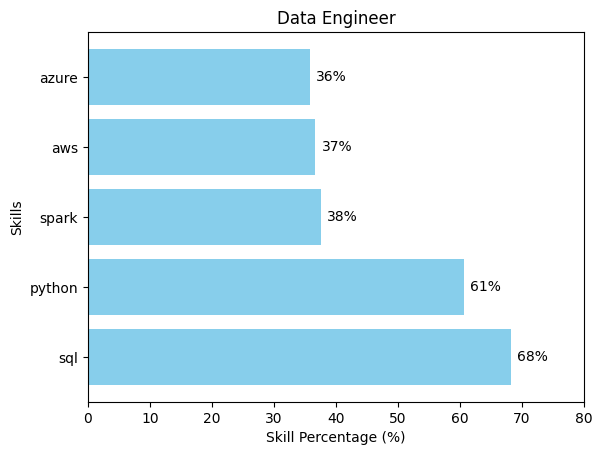

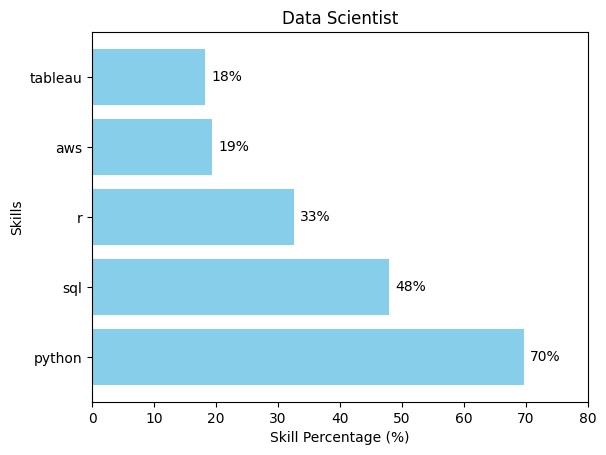

In [12]:
# Loop through job titles and plot top 5 skills using matplotlib
for job_title in job_titles:
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    
    plt.barh(df_plot['job_skills'], df_plot['skill_percent'], color="skyblue")
    plt.title(job_title)
    plt.xlabel("Skill Percentage (%)")
    plt.ylabel("Skills")

    # add % labels
    for i, v in enumerate(df_plot['skill_percent']):
        plt.text(v + 1, i, f"{v:.0f}%", va='center')

    plt.xlim(0, 80)  # keep consistent scale
    plt.show()